# Group 3 - Phase 1

Lewis M -

# Phase 1 Requirements

Deliverables:
Phase #1
1. Dataset data exploration: List the main finding of the dataset. Be thorough and creative.
For example, look at:
a. Counts, averages
b. Distribution of the number of reviews across products
c. Distribution of the number of reviews per product
d. Distribution of reviews per user
e. Review lengths and outliers
f. Analyze lengths
g. Check for duplicates
2. Text basic pre-processing:
a. Label your data based on the value of “rating of the product” i.e. as follows:
i. Ratings 4,5: Positive
ii. Rating 3: Neutral
iii. Ratings 1,2: Negative
b. Choose the appropriate columns for your sentiment analyzer. (Give this some
thought) and mention in your report why you chose each column.
c. Check for outliers
3. Study the below three Lexicons packages and choose two for model building justify why
you chose them:
i. Valence Aware Dictionary and Sentiment Reasoner (VADR) you can find
out more information here: https://github.com/cjhutto/vaderSentiment
ii. TextBlob you can find out more information here:
https://textblob.readthedocs.io/en/dev/quickstart.html
iii. SENTIWORDNET you can find more information here:
http://nmis.isti.cnr.it/sebastiani/Publications/LREC10.pdf
4. Pre-process your text as needed, justify each pre-processing step for each model you
chose. (Note: take into account the findings of step #3 above)
5. Randomly select 1000 reviews from your dataset.
6. Modeling (Sentiment Analysis) Lexicon approach:
a. Build two sentiment analysis models using the labeled pre-processed data for
both the lexicons packages the team selected in step #3 above.
7. Validate the results of both models and provide a comparison table.
8. Presentation: Check project presentation requirements.
9. Project report: Check project report requirements/ phase #1 (Make sure you reference
your work)
10. Submit documented code.



# 1. Dataset data exploration

In [6]:
#All Imported Modules(roland)


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import contractions
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


from sklearn.utils import resample
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix



In [5]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 979.2 kB/s eta 0:00:00


In [7]:
# read and load Appliances.json to data frame(roland)
df = pd.read_json("Appliances_5.json", lines=True)

In [8]:
#dataframe information(roland)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         2277 non-null   int64 
 1   verified        2277 non-null   bool  
 2   reviewTime      2277 non-null   object
 3   reviewerID      2277 non-null   object
 4   asin            2277 non-null   object
 5   style           38 non-null     object
 6   reviewerName    2277 non-null   object
 7   reviewText      2277 non-null   object
 8   summary         2277 non-null   object
 9   unixReviewTime  2277 non-null   int64 
 10  vote            2074 non-null   object
 11  image           828 non-null    object
dtypes: bool(1), int64(2), object(9)
memory usage: 198.0+ KB


In [9]:
#all List of Data Frame(roland)
df

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"08 22, 2013",A34A1UP40713F8,B00009W3I4,{'Style:': ' Dryer Vent'},James. Backus,I like this as a vent as well as something tha...,Great product,1377129600,NaN,NaN
1,5,True,"02 8, 2016",A1AHW6I678O6F2,B00009W3PA,{'Size:': ' 6-Foot'},kevin.,good item,Five Stars,1454889600,NaN,NaN
2,5,True,"08 5, 2015",A8R48NKTGCJDQ,B00009W3PA,{'Size:': ' 6-Foot'},CDBrannom,Fit my new LG dryer perfectly.,Five Stars,1438732800,NaN,NaN
3,5,True,"04 24, 2015",AR3OHHHW01A8E,B00009W3PA,{'Size:': ' 6-Foot'},Calvin E Reames,Good value for electric dryers,Perfect size,1429833600,NaN,NaN
4,5,True,"03 21, 2015",A2CIEGHZ7L1WWR,B00009W3PA,{'Size:': ' 6-Foot'},albert j. kong,Price and delivery was excellent.,Five Stars,1426896000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2272,5,True,"12 6, 2016",A2B2JVUX5YN8RU,B0006GVNOA,NaN,Caleb,Works great. I used it and an extension kit wi...,Worked like a charm,1480982400,6,[https://images-na.ssl-images-amazon.com/image...
2273,5,True,"03 20, 2016",A1IT56MV1C09VS,B0006GVNOA,NaN,Looneypenguin,Anyone who thinks they don't have a problem wi...,Excellent product and showed me that my vent o...,1458432000,5,[https://images-na.ssl-images-amazon.com/image...
2274,5,True,"10 15, 2016",A13391AZAFJ67K,B00570RQ0A,NaN,Fred A,good,Five Stars,1476489600,NaN,NaN
2275,5,True,"01 5, 2016",A2V0JXLJ9VCNNX,B00570RQ0A,NaN,Amazon Customer,washer washing,Five Stars,1451952000,NaN,NaN


# Title/Column Description
overall - Product Rating(int64)

verified - Product Verified(bool)

reviewTime - Time of the review(object)

reviewerID - ID of the reviewer(object)

asin- ID of the Product also known as Amazon Standard Identification Number(object)

style-style of the product(object)

reviewerName- The name of the reviewer of the product(object)

reviewText- Review of the product(object)

summary- Summary of the review(object)

unixReviewTime-(int64 )

vote - Votes if review is helpful or not (object)

image- Image from the user/reviewer(object)


In [10]:
#Data Frame Description(roland)
df.describe()

,overall,unixReviewTime
count,2277.000000,2.277000e+03
mean,4.499780,1.457410e+09
std,0.837723,5.639808e+07
min,1.000000,1.221523e+09
25%,4.000000,1.449274e+09
50%,5.000000,1.478650e+09
75%,5.000000,1.482278e+09
max,5.000000,1.523923e+09


In [11]:
df.count()

overall           2277
verified          2277
reviewTime        2277
reviewerID        2277
asin              2277
style               38
reviewerName      2277
reviewText        2277
summary           2277
unixReviewTime    2277
vote              2074
image              828
dtype: int64

In [12]:
#Product  Value counts(roland)
print("Product ID Breakdown:", df['asin'].value_counts(), "\n")
print("Product Style Breakdown:", df['style'].value_counts(), "\n")
print("Verified Breakdown:", df['verified'].value_counts(), "\n")

Product ID Breakdown: asin
B0006GVNOA    2040
B0014CN8Y8      24
B00JGTUQJ6      13
B0015UGPWQ      12
B00CW0O1EW       8
B0056I99WG       8
B004XLDE5A       8
B000XXWOGW       8
B0053F80JA       7
B000NCTOUM       7
B000N6302Q       7
B00P9C66PM       7
B001DPFP88       7
B00570RQ0A       6
B00DM8J11Q       6
B00MGMWTQS       6
B001769IVI       6
B001DHLGOS       6
B00126NABC       6
B004XLDDNI       5
B00470A1S0       5
B008YDSH6E       5
B004XLDHSE       5
B004UB1O9Q       5
B00W4YKCGC       5
B00009W3PA       5
B00DM8JA7Q       5
B000VL060M       4
B0053F7TQA       4
B000XXYUSM       4
B00DM8KQ2Y       4
B00AHR3IG4       4
B0042U16YI       2
B0013DN4NI       2
B00147DFQ4       2
B00186NSGS       2
B00149JVOC       2
B000XTJRRA       2
B000W3P4AQ       2
B000VLI74Y       2
B0015S4KIO       2
B00009W3I4       1
B00BIZDI0A       1
B009PCI2JU       1
B0045LLC7K       1
B001DPQPKU       1
B0009GVYNW       1
B0042ACZU2       1
Name: count, dtype: int64 

Product Style Breakdown: style
{'

In [13]:
#Rating Value counts(roland)
print("Overall/Star Breakdown:", df['overall'].value_counts(), "\n")
print("Vote Breakdown:", df['vote'].value_counts(), "\n")

Overall/Star Breakdown: overall
5    1612
3     421
4     222
2      13
1       9
Name: count, dtype: int64 

Vote Breakdown: vote
6        412
5        208
4        206
15       206
9        206
8        206
165      206
311      204
1,917    204
3          3
2          3
7          2
11         2
309        2
1,913      2
77         2
Name: count, dtype: int64 



In [14]:
#Reviewer Value counts(roland)
print("Reviewer ID Breakdown:", df['reviewerID'].value_counts(), "\n")
print("Reviewer Name Breakdown:", df['reviewerName'].value_counts(), "\n")

Reviewer ID Breakdown: reviewerID
A8WEXFRWX1ZHH     206
A1WD61B0C3KQZB    206
A25C30G90PKSQA    206
A2B2JVUX5YN8RU    206
AMY6O4Z9HINO0     206
A3TMNU7VNK5JJE    206
A1IT56MV1C09VS    206
A2LDP3A4IE9T6T    206
A21TPY9BVC9IKZ    206
A3VYM3NY7W4MX4    206
A13391AZAFJ67K      9
A3GP2HMB2AFOKF      8
A37DQO5LU8DXTV      8
A6FPI5CM4W5WB       8
A1Y4UNHRP312HS      7
A2V0JXLJ9VCNNX      7
A26M3TN8QICJ3K      7
ALZOND1IEW8KS       7
A1EUO0BU72JR7T      7
AFUVGAUNQVT0S       6
A34A1UP40713F8      6
A3LGZ8M29PBNGG      6
A3NHUQ33CFH3VM      6
A2CIEGHZ7L1WWR      6
A11SCLK8GDDN3C      6
A1LN48DHHCKLR3      6
A2OP8DEIIUESP       6
A1T1YSCDW0PD25      6
A1H2V1GNEY4LZ0      5
A8R48NKTGCJDQ       5
A2O7BWHBIV1HWZ      5
AR3OHHHW01A8E       5
A1AHW6I678O6F2      5
A329823SXZ8IBE      5
AVGG8CYK8K312       5
A3H61AMBJ177DG      5
A1RQQV9HYHDHDN      5
A23KSPVPHZF6EO      5
A3J8IC20SGBS2O      5
A1OB2H416ARLFJ      5
A1HWFUO5PKB2RW      5
A3SM7H70QI3TY8      5
A3B1B4E184FSUZ      5
AJPRN1TD1A0SD       

In [15]:
#Time(roland)
print("unixReviewTime Breakdown:", df['unixReviewTime'].value_counts(), "\n")
print("Review Time Breakdown:", df['reviewTime'].value_counts(), "\n")


unixReviewTime Breakdown: unixReviewTime
1480982400    412
1482278400    207
1487980800    206
1299024000    206
1515974400    206
             ... 
1486339200      1
1473379200      1
1441584000      1
1411344000      1
1480896000      1
Name: count, Length: 99, dtype: int64 

Review Time Breakdown: reviewTime
12 6, 2016     412
12 21, 2016    207
02 25, 2017    206
03 2, 2011     206
01 15, 2018    206
              ... 
02 6, 2017       1
09 9, 2016       1
09 7, 2015       1
09 22, 2014      1
12 5, 2016       1
Name: count, Length: 99, dtype: int64 



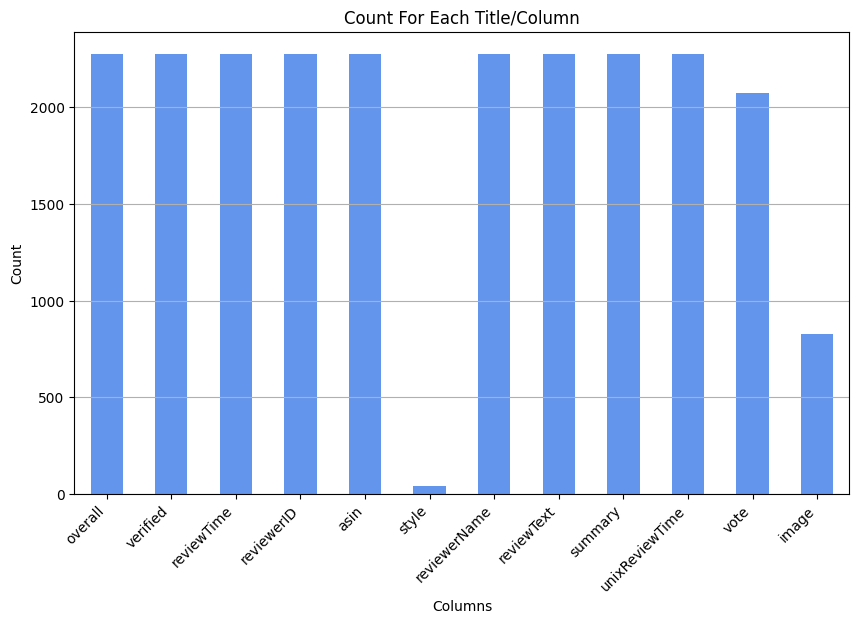

In [16]:
# Plot bar per Title(roland)
plt.figure(figsize=(10, 6))
df.count().plot(kind='bar', color='cornflowerblue')
plt.title('Count For Each Title/Column')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='solid', alpha=1)
plt.show()

In [17]:
#Count and Average of overall and review time(roland)

print("Overall Average =",df['overall'].mean())
print("Overall  Counts =",df['overall'].count())
print("Product ID  Counts =",df['asin'].count())

Overall Average = 4.499780412823891
Overall  Counts = 2277
Product ID  Counts = 2277


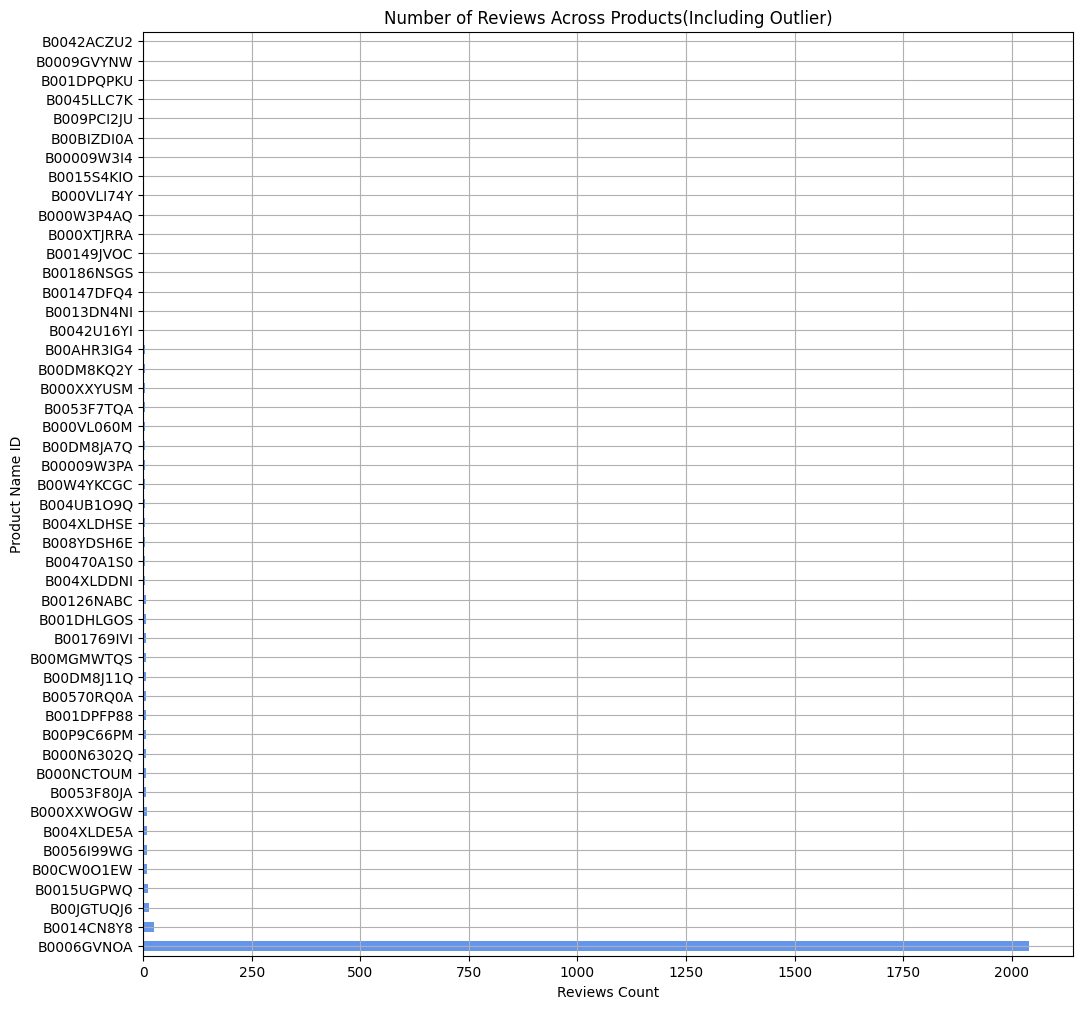

In [18]:
# number of reviews per product(roland)
plt.figure(figsize=(12, 12))
df['asin'].value_counts().plot(kind='barh', color='cornflowerblue')
plt.title('Number of Reviews Across Products(Including Outlier)')
plt.ylabel('Product Name ID')
plt.xlabel('Reviews Count')
plt.grid( linestyle='solid', alpha=1)
plt.show()

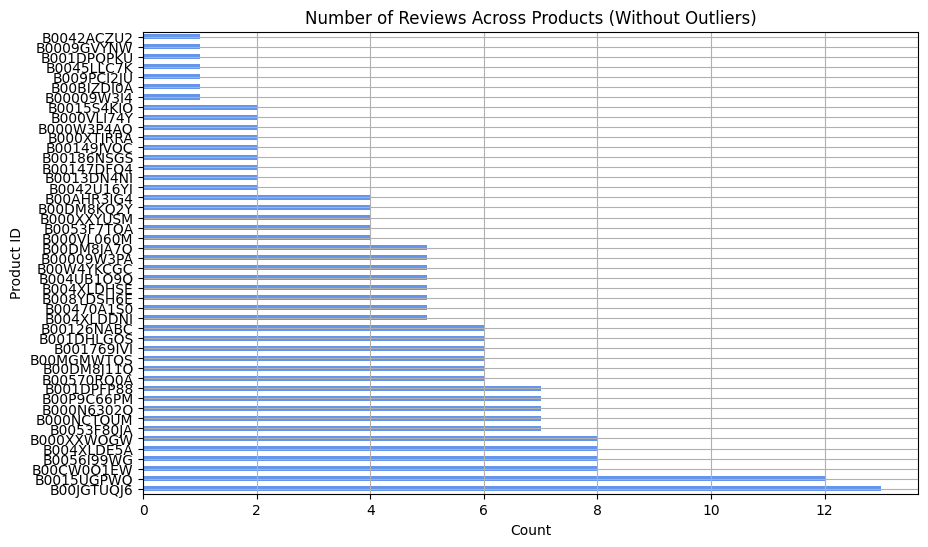

In [19]:
# Assigning Value to Q1 and Q3(roland)
Q1 = df['asin'].value_counts().quantile(0.25)
Q3 = df['asin'].value_counts().quantile(0.75)
# IQR= Interquartile range
IQR = Q3 - Q1
# Define the lower and upper bounds for outliers
lower_quartile = Q1 - 1.5 * IQR
upper_quartile = Q3 + 1.5 * IQR

# Filter/removing outliers
filtered = df['asin'].value_counts()[(df['asin'].value_counts() >= lower_quartile) & (df['asin'].value_counts() <= upper_quartile)]

# Plot bar chart for filtered 'asin' value counts
plt.figure(figsize=(10, 6))
filtered.plot(kind='barh', color='cornflowerblue')
plt.title('Number of Reviews Across Products (Without Outliers)')
plt.xlabel('Count')
plt.ylabel('Product ID')
plt.grid( linestyle='solid', alpha=1)
plt.show()

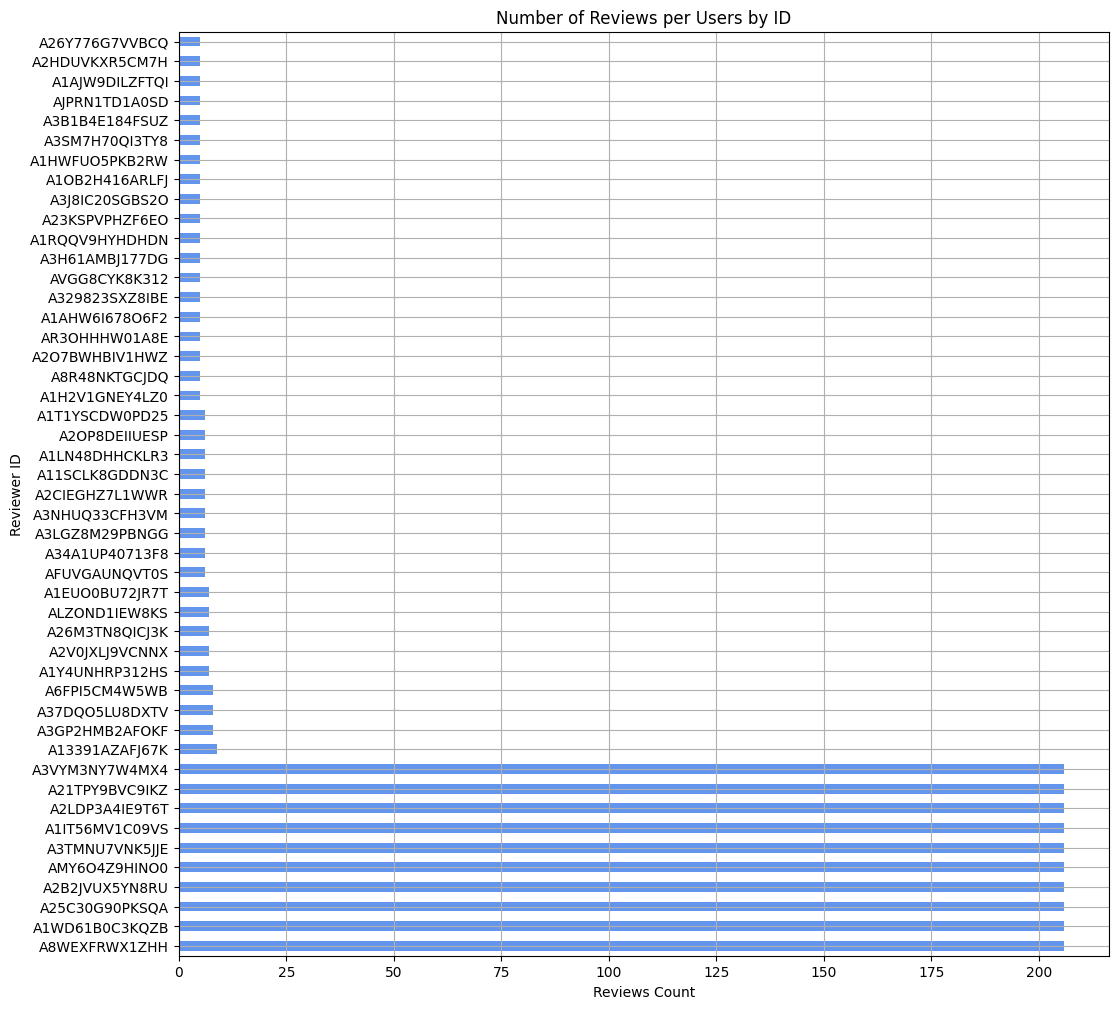

In [20]:
# number of reviews per product(roland)
plt.figure(figsize=(12, 12))
df['reviewerID'].value_counts().plot(kind='barh', color='cornflowerblue')
plt.title('Number of Reviews per Users by ID')
plt.ylabel('Reviewer ID')
plt.xlabel('Reviews Count')
plt.grid( linestyle='solid', alpha=1)
plt.show()

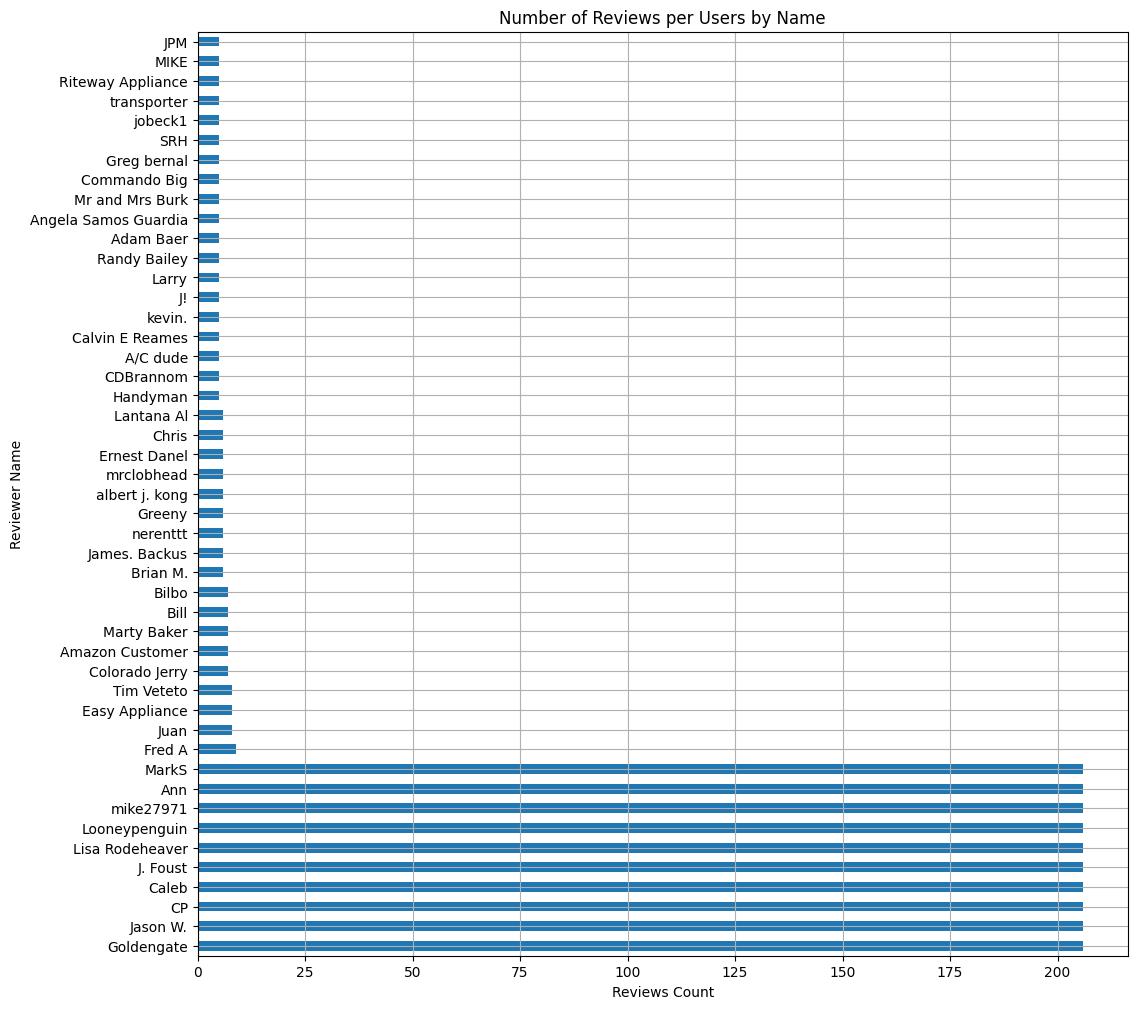

In [21]:
# number of User reviews(roland)
plt.figure(figsize=(12, 12))
df['reviewerName'].value_counts().plot(kind='barh')
plt.title('Number of Reviews per Users by Name')
plt.ylabel('Reviewer Name')
plt.xlabel('Reviews Count')
plt.grid( linestyle='solid', alpha=1)
plt.show()

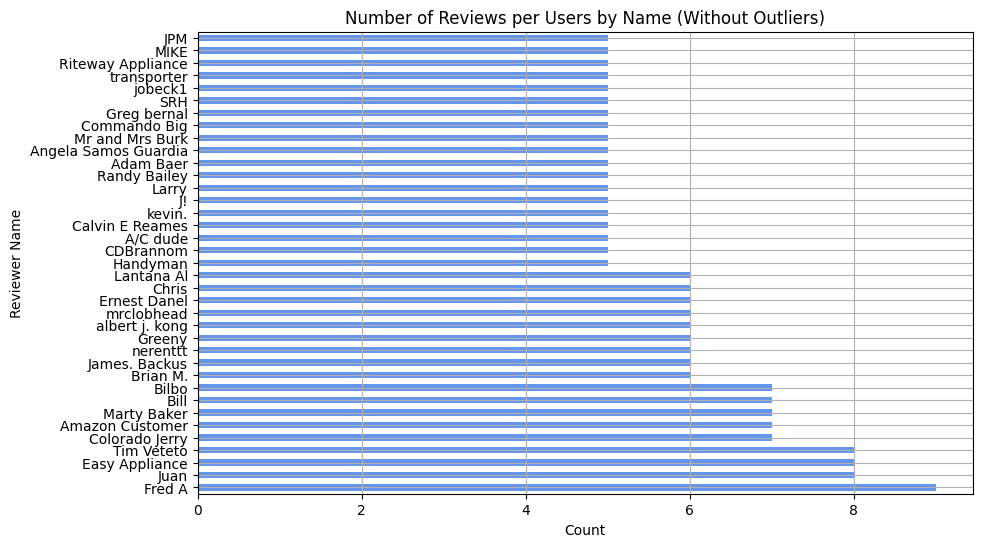

In [22]:
# Assigning Value to Q1 and Q3(roland)
Q1 = df['reviewerName'].value_counts().quantile(0.25)
Q3 = df['reviewerName'].value_counts().quantile(0.75)
# IQR= Interquartile range
IQR = Q3 - Q1
# Define the lower and upper bounds for outliers
lower_quartile = Q1 - 1.5 * IQR
upper_quartile = Q3 + 1.5 * IQR

# Filter/removing outliers
filtered = df['reviewerName'].value_counts()[(df['reviewerName'].value_counts() >= lower_quartile) & (df['reviewerName'].value_counts() <= upper_quartile)]

# Plot bar chart for filtered 'asin' value counts
plt.figure(figsize=(10, 6))
filtered.plot(kind='barh', color='cornflowerblue')
plt.title('Number of Reviews per Users by Name (Without Outliers)')
plt.xlabel('Count')
plt.ylabel('Reviewer Name')
plt.grid( linestyle='solid', alpha=1)
plt.show()

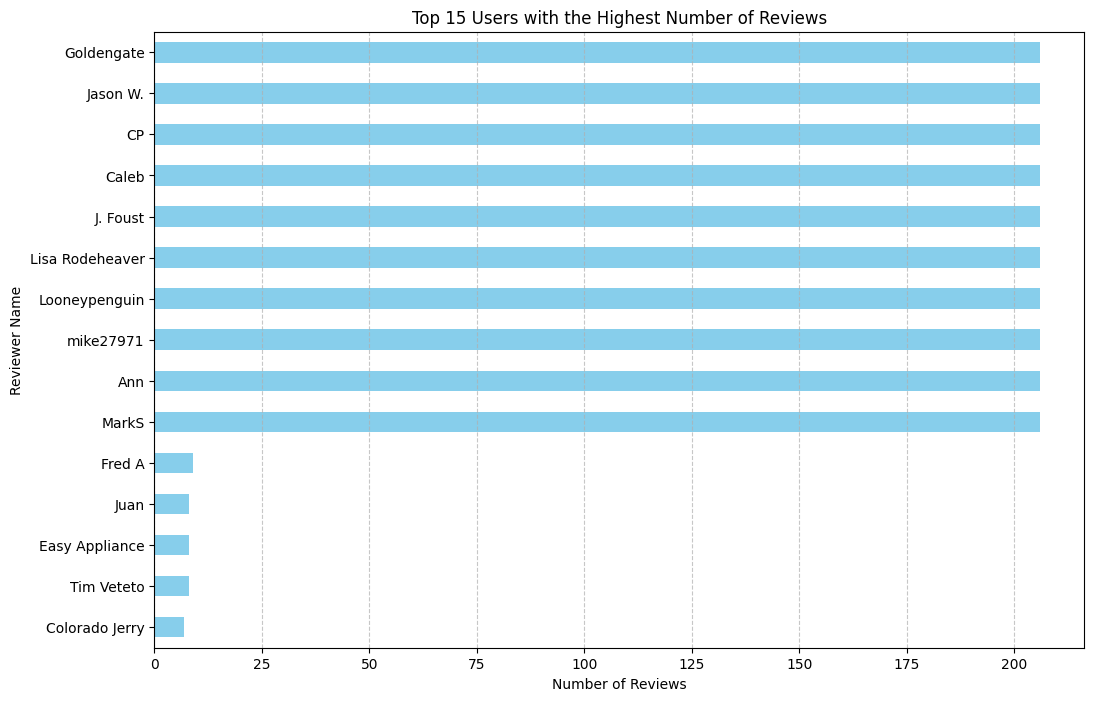

In [23]:
# plotting top 15 reviewers
plt.figure(figsize=(12, 8))
df['reviewerName'].value_counts().nlargest(15).plot(kind='barh', color='skyblue')
plt.title('Top 15 Users with the Highest Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Reviewer Name')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest count at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


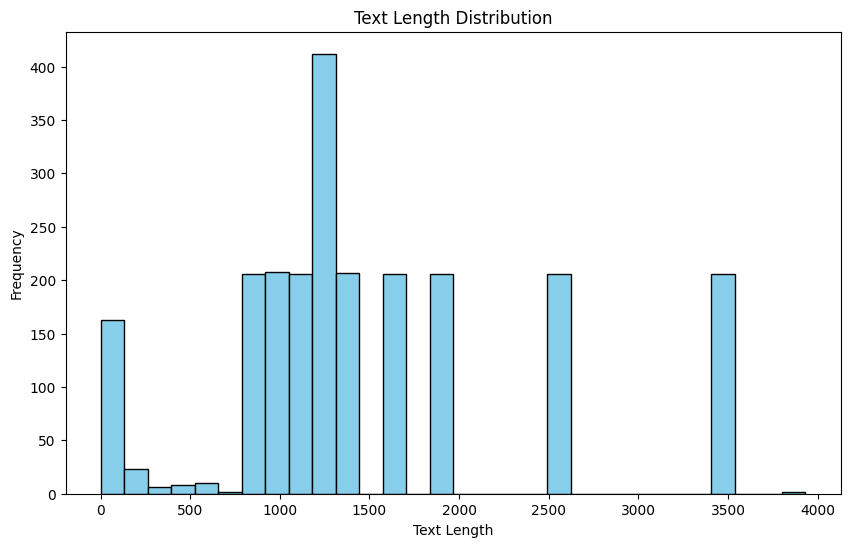

In [24]:
# Analyzing lengths (Christian)
plt.figure(figsize=(10, 6))
df['text_length'] = df['reviewText'].apply(len)
plt.hist(df['text_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [25]:
# Checking for duplicates (Christian)
duplicates = df[df.duplicated("reviewText")]

# Print just the content of the 'reviewText' column for duplicates found
print("Duplicates found:")
print(duplicates['reviewText'])

Duplicates found:
11      Be careful, NewAir will not stand by their pro...
12      We would give less than 1 star if possible DON...
13      We would give less than 1 star if possible DON...
29                                            received ok
34      i cook only once in a blue moon.  i was shocke...
                              ...                        
2270    Great product but they need to include more ro...
2271    first thing first: it works. the kit is great ...
2272    Works great. I used it and an extension kit wi...
2273    Anyone who thinks they don't have a problem wi...
2274                                                 good
Name: reviewText, Length: 2133, dtype: object


Number of Verified(True) vs Unverified(False) verified
True     2248
False      29
Name: count, dtype: int64


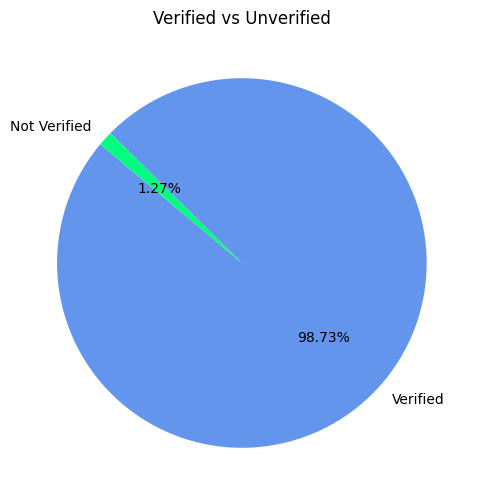

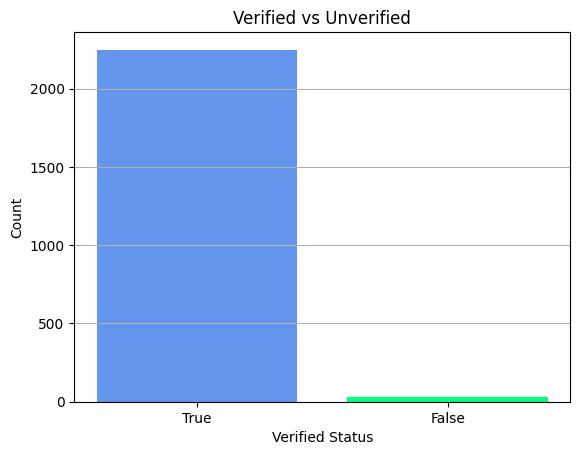

In [26]:
#verified reviews count distribution(roland)
print("Number of Verified(True) vs Unverified(False)",df['verified'].value_counts())

labels = ['Verified','Not Verified']
value_counts = df['verified'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=labels, autopct='%2.2f%%', startangle=140, colors = ['cornflowerblue', 'springgreen'])
plt.title('Verified vs Unverified')
plt.grid( linestyle='solid', alpha=1)
plt.show()

plt.bar(value_counts.index.astype(str), value_counts.values, color=['cornflowerblue', 'springgreen'])
plt.xlabel('Verified Status')
plt.ylabel('Count')
plt.title('Verified vs Unverified')
plt.grid(axis='y', linestyle='solid', alpha=1)

plt.show()

# 2. Text basic pre-processing

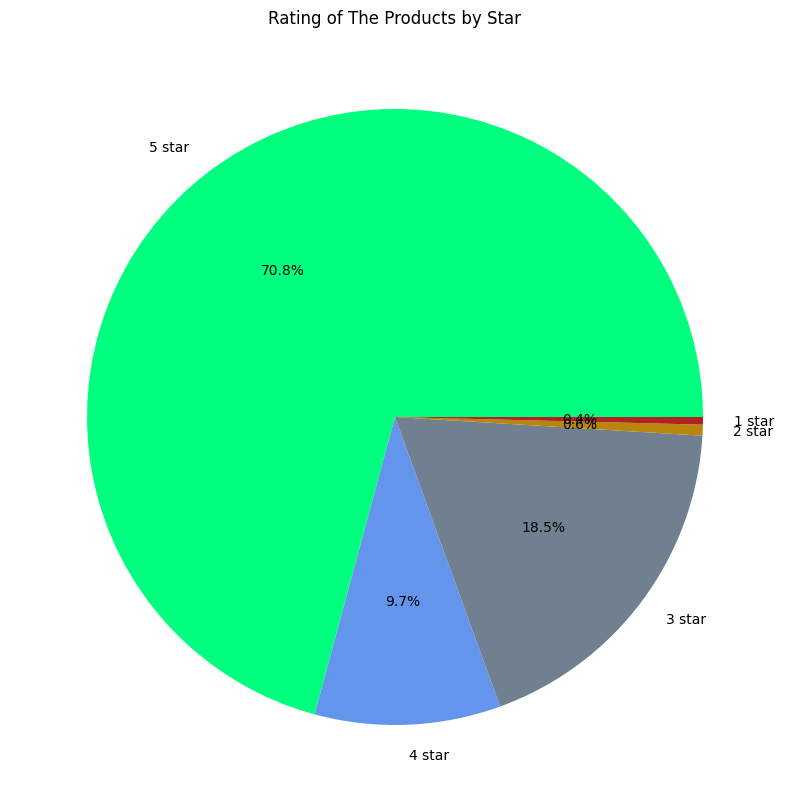

In [27]:
# Pie Chart(roland)
value_counts = df['overall'].value_counts()
min_rating = df['overall'].min()
max_rating = df['overall'].max()
labels = [f"{i} star" for i in range(max_rating, min_rating - 1, -1)]

# Sorting counts in descending order
sorted_counts = value_counts.sort_index(ascending=False)

# Plotting the pie chart with dynamically generated labels and sorted counts
plt.figure(figsize=(10, 10))
plt.pie(sorted_counts, labels=labels, autopct='%1.1f%%', labeldistance=1.10, colors = ['springgreen', 'cornflowerblue','slategray', 'darkgoldenrod','firebrick'] )
plt.title('Rating of The Products by Star')
plt.show()


Counts of each category:
rating
Positive    1834
Neutral      421
Negative      22
Name: count, dtype: int64


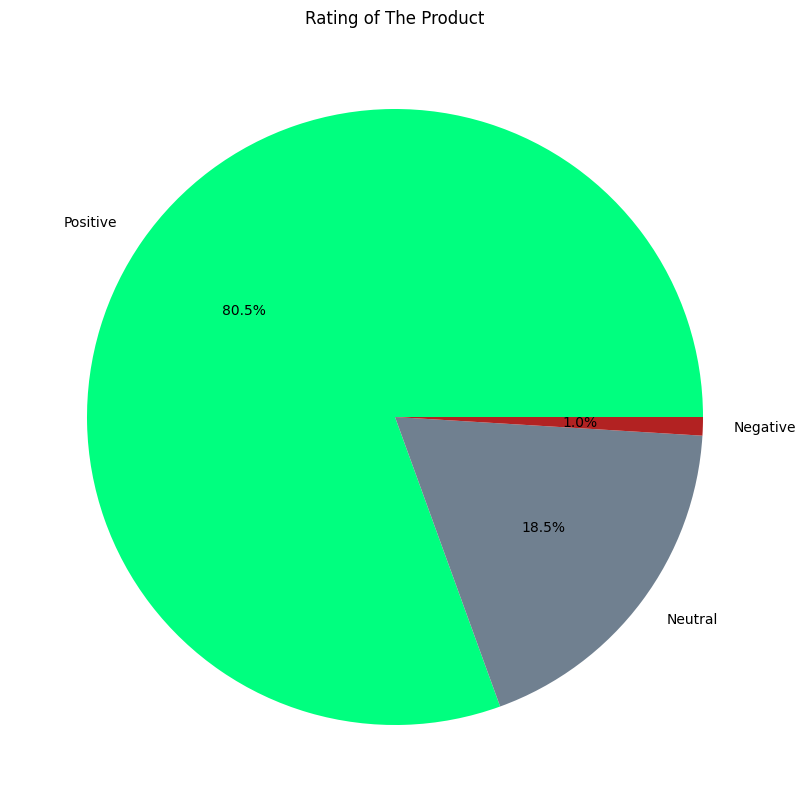

In [28]:
#pie chart with if x<2='negative', else if x = 'neutral', else 'positive'(roland)
print("Counts of each category:")

df['rating'] = df['overall'].apply(lambda x: 'Negative' if x <= 2 else ('Neutral' if x == 3 else 'Positive'))
print(df['rating'].value_counts())
plt.figure(figsize=(10, 10))
plt.pie(df['rating'].value_counts(), labels=df['rating'].value_counts().index, autopct='%1.1f%%', labeldistance=1.10, colors=['springgreen', 'slategray', 'firebrick'])
plt.title('Rating of The Product')
plt.show()




In [29]:
#updated df with rating column added(roland)
df

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,text_length,rating
0,5,True,"08 22, 2013",A34A1UP40713F8,B00009W3I4,{'Style:': ' Dryer Vent'},James. Backus,I like this as a vent as well as something tha...,Great product,1377129600,NaN,NaN,157,Positive
1,5,True,"02 8, 2016",A1AHW6I678O6F2,B00009W3PA,{'Size:': ' 6-Foot'},kevin.,good item,Five Stars,1454889600,NaN,NaN,9,Positive
2,5,True,"08 5, 2015",A8R48NKTGCJDQ,B00009W3PA,{'Size:': ' 6-Foot'},CDBrannom,Fit my new LG dryer perfectly.,Five Stars,1438732800,NaN,NaN,30,Positive
3,5,True,"04 24, 2015",AR3OHHHW01A8E,B00009W3PA,{'Size:': ' 6-Foot'},Calvin E Reames,Good value for electric dryers,Perfect size,1429833600,NaN,NaN,30,Positive
4,5,True,"03 21, 2015",A2CIEGHZ7L1WWR,B00009W3PA,{'Size:': ' 6-Foot'},albert j. kong,Price and delivery was excellent.,Five Stars,1426896000,NaN,NaN,33,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2272,5,True,"12 6, 2016",A2B2JVUX5YN8RU,B0006GVNOA,NaN,Caleb,Works great. I used it and an extension kit wi...,Worked like a charm,1480982400,6,[https://images-na.ssl-images-amazon.com/image...,888,Positive
2273,5,True,"03 20, 2016",A1IT56MV1C09VS,B0006GVNOA,NaN,Looneypenguin,Anyone who thinks they don't have a problem wi...,Excellent product and showed me that my vent o...,1458432000,5,[https://images-na.ssl-images-amazon.com/image...,1139,Positive
2274,5,True,"10 15, 2016",A13391AZAFJ67K,B00570RQ0A,NaN,Fred A,good,Five Stars,1476489600,NaN,NaN,4,Positive
2275,5,True,"01 5, 2016",A2V0JXLJ9VCNNX,B00570RQ0A,NaN,Amazon Customer,washer washing,Five Stars,1451952000,NaN,NaN,14,Positive


In [30]:
#making outlier for the text based on their length size(roland)
df['text_length'] = df['reviewText'].apply(len)
Q1 = df['text_length'].quantile(0.25)
Q3 = df['text_length'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_quantile = Q1 - 1.5 * IQR
upper_quantile = Q3 + 1.5 * IQR

# Identify outliers based on the lower and upper bounds
outliers = df[(df['text_length'] < lower_quantile) | (df['text_length'] > upper_quantile)]

# Display outliers
print("Text outliers based on IQR method:")
outliers[['reviewText', 'text_length', 'summary']]


Text outliers based on IQR method:


,reviewText,text_length,summary
9,"Be careful, NewAir will not stand by their pro...",3932,NewAir will not stand behind their products - ...
11,"Be careful, NewAir will not stand by their pro...",3932,NewAir will not stand behind their products - ...
38,This review is for Gardus RLE202 LintEater 10-...,3421,5 stars isn't enough to rate this product! It'...
77,This review is for Gardus RLE202 LintEater 10-...,3421,5 stars isn't enough to rate this product! It'...
118,This review is for Gardus RLE202 LintEater 10-...,3421,5 stars isn't enough to rate this product! It'...
...,...,...,...
2108,This review is for Gardus RLE202 LintEater 10-...,3421,5 stars isn't enough to rate this product! It'...
2118,This review is for Gardus RLE202 LintEater 10-...,3421,5 stars isn't enough to rate this product! It'...
2128,This review is for Gardus RLE202 LintEater 10-...,3421,5 stars isn't enough to rate this product! It'...
2138,This review is for Gardus RLE202 LintEater 10-...,3421,5 stars isn't enough to rate this product! It'...


In [31]:
# Columns that will be used for Sentiment Analysis(roland)
selected_columns = df[['overall','rating', 'reviewText','summary']]
selected_columns

,overall,rating,reviewText,summary
0,5,Positive,I like this as a vent as well as something tha...,Great product
1,5,Positive,good item,Five Stars
2,5,Positive,Fit my new LG dryer perfectly.,Five Stars
3,5,Positive,Good value for electric dryers,Perfect size
4,5,Positive,Price and delivery was excellent.,Five Stars
...,...,...,...,...
2272,5,Positive,Works great. I used it and an extension kit wi...,Worked like a charm
2273,5,Positive,Anyone who thinks they don't have a problem wi...,Excellent product and showed me that my vent o...
2274,5,Positive,good,Five Stars
2275,5,Positive,washer washing,Five Stars


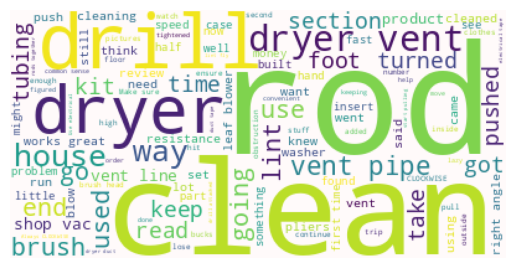

In [32]:
#wordcloud for reviewText(can be use for textblob lexicon)(roland)
from wordcloud import WordCloud
wcreviewtext = " ".join(review for review in selected_columns['reviewText'].dropna())
wordcloud = WordCloud(background_color="snow").generate(wcreviewtext)
plt.imshow(wordcloud, interpolation='hamming')
plt.axis("off")
plt.show()

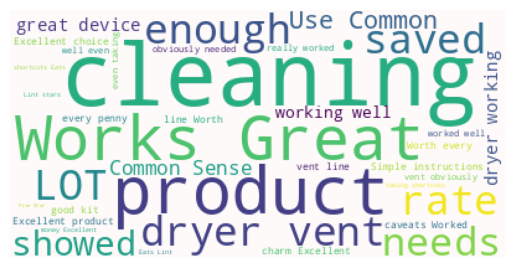

In [33]:
#wordcloud for summary(can be use for textblob lexicon)(roland)
wcreviewtext = " ".join(review for review in selected_columns['summary'].dropna())
wordcloud = WordCloud(background_color="snow").generate(wcreviewtext)
plt.imshow(wordcloud, interpolation='hamming')
plt.axis("off")
plt.show()

# 3. Two Lexicons Packages

In [34]:
# need to download vader to be used(roland)
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

# 4. Pre-process your text as needed, justify each pre-processing step for each model you

In [35]:
# Create a SentimentIntensityAnalyzer object(roland)
sia = SentimentIntensityAnalyzer()

# Function to preprocess text using VADER and return compound sentiment score
def preprocess_text_with_vader(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

In [36]:
# Vader Preprocess column using reviewText(roland)
df['reviewText_vaderValue'] = df['reviewText'].apply(preprocess_text_with_vader)
df['reviewText_vaderRating'] = df['reviewText_vaderValue'].apply(lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))


df[['overall', 'rating', 'reviewText', 'reviewText_vaderValue', 'reviewText_vaderRating']]

,overall,rating,reviewText,reviewText_vaderValue,reviewText_vaderRating
0,5,Positive,I like this as a vent as well as something tha...,0.8720,Positive
1,5,Positive,good item,0.4404,Positive
2,5,Positive,Fit my new LG dryer perfectly.,0.7717,Positive
3,5,Positive,Good value for electric dryers,0.6486,Positive
4,5,Positive,Price and delivery was excellent.,0.5719,Positive
...,...,...,...,...,...
2272,5,Positive,Works great. I used it and an extension kit wi...,0.9591,Positive
2273,5,Positive,Anyone who thinks they don't have a problem wi...,0.9443,Positive
2274,5,Positive,good,0.4404,Positive
2275,5,Positive,washer washing,0.0000,Neutral


In [37]:
# Vader Preprocess column using summary(roland)
df['summary_vaderValue'] = df['summary'].apply(preprocess_text_with_vader)
df['summary_vaderRating'] = df['summary_vaderValue'].apply(lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))


df[['overall', 'rating', 'summary','summary_vaderValue', 'summary_vaderRating']]

,overall,rating,summary,summary_vaderValue,summary_vaderRating
0,5,Positive,Great product,0.6249,Positive
1,5,Positive,Five Stars,0.0000,Neutral
2,5,Positive,Five Stars,0.0000,Neutral
3,5,Positive,Perfect size,0.5719,Positive
4,5,Positive,Five Stars,0.0000,Neutral
...,...,...,...,...,...
2272,5,Positive,Worked like a charm,0.6369,Positive
2273,5,Positive,Excellent product and showed me that my vent o...,0.5719,Positive
2274,5,Positive,Five Stars,0.0000,Neutral
2275,5,Positive,Five Stars,0.0000,Neutral


# 5 Randomly select 1000 reviews from your dataset

In [38]:
# Randomly select 1000 reviews from your dataset.(roland)
random_df = df.sample(n=1000, random_state=75)
random_df


,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,text_length,rating,reviewText_vaderValue,reviewText_vaderRating,summary_vaderValue,summary_vaderRating
2220,5,True,"12 10, 2014",AVGG8CYK8K312,B00DM8JA7Q,NaN,Larry,These are a great buy I replace alot of them t...,Lid switch,1418169600,NaN,NaN,66,Positive,0.8126,Positive,0.0000,Neutral
1957,5,True,"03 2, 2011",A21TPY9BVC9IKZ,B0006GVNOA,NaN,Ann,"So, this is what life comes down to when you a...",Eats Lint,1299024000,"1,917",NaN,1198,Positive,0.8141,Positive,0.0000,Neutral
900,3,True,"09 10, 2016",A3TMNU7VNK5JJE,B0006GVNOA,NaN,Lisa Rodeheaver,At first this contraption was a little confusi...,Does what it needs to,1473465600,8,NaN,971,Neutral,0.8606,Positive,0.0000,Neutral
508,5,True,"12 21, 2016",A3VYM3NY7W4MX4,B0006GVNOA,NaN,MarkS,This review is for Gardus RLE202 LintEater 10-...,5 stars isn't enough to rate this product! It'...,1482278400,15,NaN,3421,Positive,0.9737,Positive,0.5242,Positive
1980,3,True,"09 10, 2016",A3TMNU7VNK5JJE,B0006GVNOA,NaN,Lisa Rodeheaver,At first this contraption was a little confusi...,Does what it needs to,1473465600,8,NaN,971,Neutral,0.8606,Positive,0.0000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,3,True,"12 6, 2016",A25C30G90PKSQA,B0006GVNOA,NaN,CP,first thing first: it works. the kit is great ...,good kit with some caveats,1480982400,6,NaN,1196,Neutral,0.8544,Positive,0.4404,Positive
576,5,True,"12 5, 2015",A2LDP3A4IE9T6T,B0006GVNOA,NaN,mike27971,We have 24 foot of solid dryer vent pipe endin...,This really worked well even taking shortcuts,1449273600,165,[https://images-na.ssl-images-amazon.com/image...,1864,Positive,0.9483,Positive,0.3353,Positive
1170,3,True,"09 10, 2016",A3TMNU7VNK5JJE,B0006GVNOA,NaN,Lisa Rodeheaver,At first this contraption was a little confusi...,Does what it needs to,1473465600,8,NaN,971,Neutral,0.8606,Positive,0.0000,Neutral
1705,5,True,"02 25, 2017",A8WEXFRWX1ZHH,B0006GVNOA,NaN,Goldengate,I bought this last October and finally got aro...,A great device that has my dryer working well ...,1487980800,311,NaN,1662,Positive,0.9734,Positive,0.7351,Positive


# 6. Modeling (Sentiment Analysis) Lexicon approach:

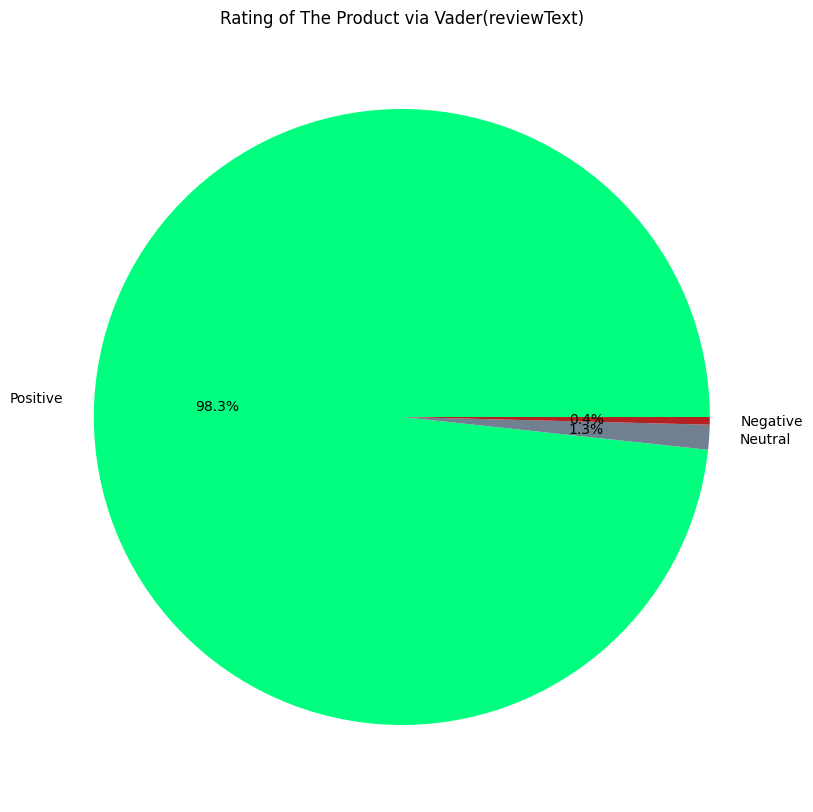

Counts of each category:
reviewText_vaderRating
Positive    983
Neutral      13
Negative      4
Name: count, dtype: int64


In [39]:
# Vader modeling/plotting using reviewText_vaderRating(roland)
plt.figure(figsize=(10, 10))
plt.pie(random_df['reviewText_vaderRating'].value_counts(), labels=random_df['reviewText_vaderRating'].value_counts().index, autopct='%1.1f%%', labeldistance=1.10, colors=['springgreen', 'slategray', 'firebrick'])
plt.title('Rating of The Product via Vader(reviewText)')
plt.show()

print("Counts of each category:")
print(random_df['reviewText_vaderRating'].value_counts())

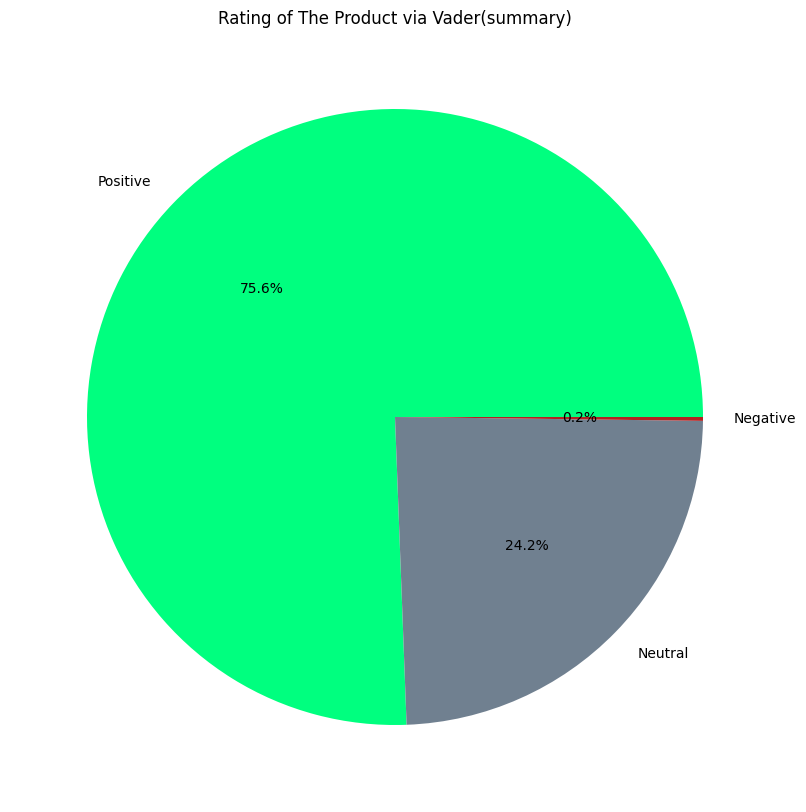

Counts of each category:
summary_vaderRating
Positive    756
Neutral     242
Negative      2
Name: count, dtype: int64


In [40]:
# Vader modeling/plotting using summary_vaderRating(roland)
plt.figure(figsize=(10, 10))
plt.pie(random_df['summary_vaderRating'].value_counts(), labels=random_df['summary_vaderRating'].value_counts().index, autopct='%1.1f%%', labeldistance=1.10, colors=['springgreen', 'slategray', 'firebrick'])
plt.title('Rating of The Product via Vader(summary)')
plt.show()

print("Counts of each category:")
print(random_df['summary_vaderRating'].value_counts())

Counts of each category for reviewText_vaderRating:
reviewText_vaderRating
Positive    983
Neutral      13
Negative      4
Name: count, dtype: int64

Counts of each category for summary_vaderRating:
summary_vaderRating
Positive    756
Neutral     242
Negative      2
Name: count, dtype: int64

Counts of each category for overall rating:
rating
Positive    1834
Neutral      421
Negative      22
Name: count, dtype: int64


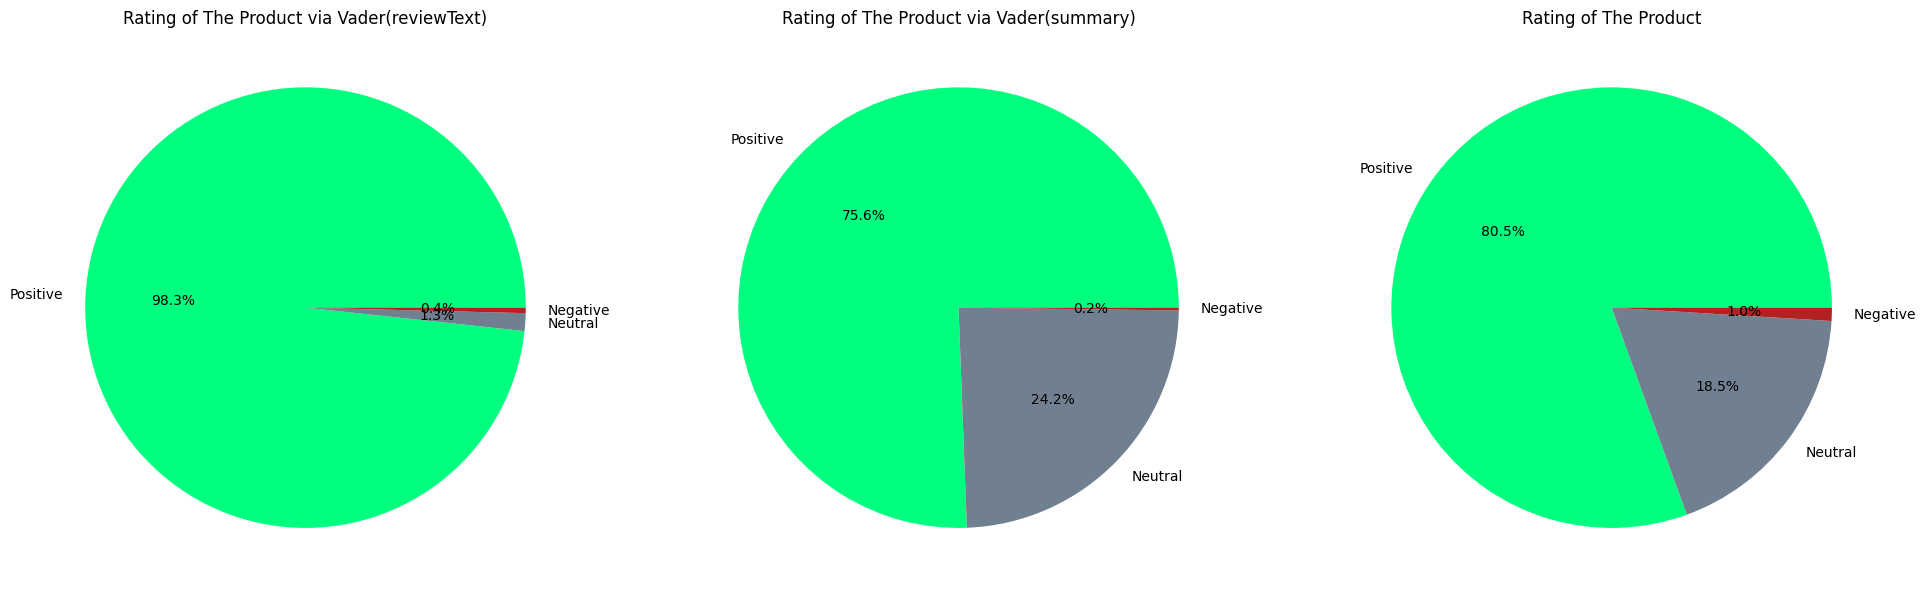

In [41]:
# Setting up subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Vader modeling/plotting using reviewText_vaderRating(roland)
axes[0].pie(random_df['reviewText_vaderRating'].value_counts(), labels=random_df['reviewText_vaderRating'].value_counts().index, autopct='%1.1f%%', labeldistance=1.10, colors=['springgreen', 'slategray', 'firebrick'])
axes[0].set_title('Rating of The Product via Vader(reviewText)')

# Vader modeling/plotting using summary_vaderRating(roland)
axes[1].pie(random_df['summary_vaderRating'].value_counts(), labels=random_df['summary_vaderRating'].value_counts().index, autopct='%1.1f%%', labeldistance=1.10, colors=['springgreen', 'slategray', 'firebrick'])
axes[1].set_title('Rating of The Product via Vader(summary)')

# Pie chart with if x<2='negative', else if x = 'neutral', else 'positive'(roland)
df['rating'] = df['overall'].apply(lambda x: 'Negative' if x <= 2 else ('Neutral' if x == 3 else 'Positive'))
axes[2].pie(df['rating'].value_counts(), labels=df['rating'].value_counts().index, autopct='%1.1f%%', labeldistance=1.10, colors=['springgreen', 'slategray', 'firebrick'])
axes[2].set_title('Rating of The Product')

# Show counts of each category
print("Counts of each category for reviewText_vaderRating:")
print(random_df['reviewText_vaderRating'].value_counts())
print("\nCounts of each category for summary_vaderRating:")
print(random_df['summary_vaderRating'].value_counts())
print("\nCounts of each category for overall rating:")
print(df['rating'].value_counts())

plt.tight_layout()
plt.show()


# 7. Validate the results of both models and provide a comparison table.

In [42]:
#just a guide, will be deleted
random_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 2220 to 1274
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   overall                 1000 non-null   int64  
 1   verified                1000 non-null   bool   
 2   reviewTime              1000 non-null   object 
 3   reviewerID              1000 non-null   object 
 4   asin                    1000 non-null   object 
 5   style                   13 non-null     object 
 6   reviewerName            1000 non-null   object 
 7   reviewText              1000 non-null   object 
 8   summary                 1000 non-null   object 
 9   unixReviewTime          1000 non-null   int64  
 10  vote                    916 non-null    object 
 11  image                   357 non-null    object 
 12  text_length             1000 non-null   int64  
 13  rating                  1000 non-null   object 
 14  reviewText_vaderValue   1000 non-null   fl

In [43]:
from textblob import TextBlob

In [44]:
# Function to calculate sentiment polarity using TextBlob
def calculate_textblob_polarity(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    return polarity

In [45]:
# Function to categorize sentiment based on polarity
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [46]:
# Apply TextBlob sentiment analysis to reviewText
df['reviewText_textblobPolarity'] = df['reviewText'].apply(calculate_textblob_polarity)
df['reviewText_textblobSentiment'] = df['reviewText_textblobPolarity'].apply(categorize_sentiment)

In [47]:
# Apply TextBlob sentiment analysis to summary
df['summary_textblobPolarity'] = df['summary'].apply(calculate_textblob_polarity)
df['summary_textblobSentiment'] = df['summary_textblobPolarity'].apply(categorize_sentiment)

In [48]:
# Display sentiment analysis results
print("Sentiment analysis results using TextBlob:")
print(df[['reviewText', 'reviewText_textblobPolarity', 'reviewText_textblobSentiment']].head())
print(df[['summary', 'summary_textblobPolarity', 'summary_textblobSentiment']].head())

Sentiment analysis results using TextBlob:
                                          reviewText  \
0  I like this as a vent as well as something tha...   
1                                          good item   
2                     Fit my new LG dryer perfectly.   
3                     Good value for electric dryers   
4                  Price and delivery was excellent.   

   reviewText_textblobPolarity reviewText_textblobSentiment  
0                     0.400000                     Positive  
1                     0.700000                     Positive  
2                     0.512121                     Positive  
3                     0.700000                     Positive  
4                     1.000000                     Positive  
         summary  summary_textblobPolarity summary_textblobSentiment
0  Great product                       0.8                  Positive
1     Five Stars                       0.0                   Neutral
2     Five Stars                       0.

In [49]:
import matplotlib.pyplot as plt

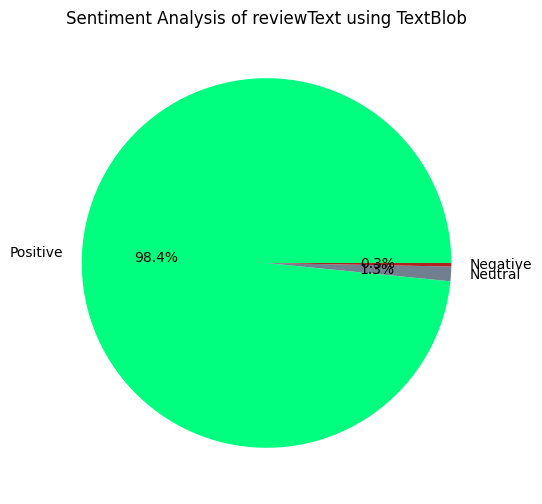

In [50]:
# Plotting sentiment analysis results for reviewText
plt.figure(figsize=(10, 6))
df['reviewText_textblobSentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['springgreen', 'slategray', 'firebrick'])
plt.title('Sentiment Analysis of reviewText using TextBlob')
plt.ylabel('')
plt.show()

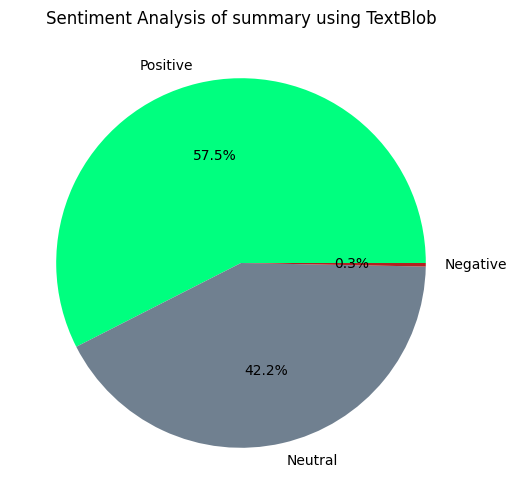

In [51]:
# Plotting sentiment analysis results for summary
plt.figure(figsize=(10, 6))
df['summary_textblobSentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['springgreen', 'slategray', 'firebrick'])
plt.title('Sentiment Analysis of summary using TextBlob')
plt.ylabel('')
plt.show()

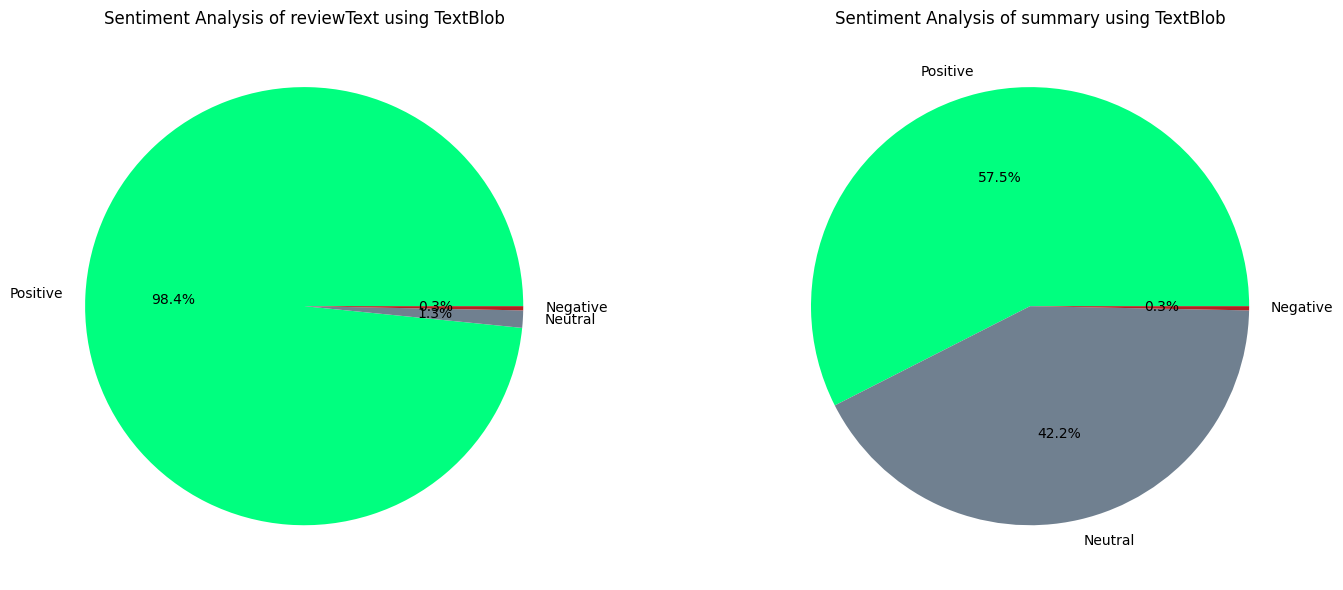

In [52]:
# Setting up subplots for comparison with VADER results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plotting sentiment analysis results for reviewText
df['reviewText_textblobSentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[0], colors=['springgreen', 'slategray', 'firebrick'])
axes[0].set_title('Sentiment Analysis of reviewText using TextBlob')
axes[0].set_ylabel('')

# Plotting sentiment analysis results for summary
df['summary_textblobSentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1], colors=['springgreen', 'slategray', 'firebrick'])
axes[1].set_title('Sentiment Analysis of summary using TextBlob')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

In [53]:
# Phase 2

In [63]:
# Load the full dataset (Christian)
full_dataset = pd.read_json('Appliances.json', lines=True)

In [64]:
# Full set (Christian)
full_dataset.info

<bound method DataFrame.info of         overall vote  verified   reviewTime      reviewerID        asin  \
0             5    2     False  11 27, 2013  A3NHUQ33CFH3VM  1118461304   
1             5  NaN     False   11 1, 2013  A3SK6VNBQDNBJE  1118461304   
2             5  NaN     False  10 10, 2013  A3SOFHUR27FO3K  1118461304   
3             5  NaN     False   10 9, 2013  A1HOG1PYCAE157  1118461304   
4             5   10     False   09 7, 2013  A26JGAM6GZMM4V  1118461304   
...         ...  ...       ...          ...             ...         ...   
602772        5  NaN      True  08 10, 2017  A24A9P4F2SLTK5  B01HJH2PY0   
602773        2  NaN      True   08 1, 2018  A2JCB4KHBWEELW  B01HJHHEA0   
602774        5  NaN      True  04 13, 2018  A1LDYYVTLPP2Z5  B01HJHHEA0   
602775        1  NaN      True  03 23, 2018   AP1M5O06IOYZ7  B01HJH92JQ   
602776        3  NaN      True   01 8, 2018  A1BU98NV4Y0P9K  B01HJH92JQ   

                                 style              reviewerName  \
0            {'Format:': ' Hardcover'}                    Greeny   
1       {'Format:': ' Kindle Edition'}           Leif C. Ulstrup   
2            {'Format:': ' Hardcover'}  Harry Gilbert Miller III   
3            {'Format:': ' Hardcover'}            Rebecca Ripley   
4            {'Format:': ' Hardcover'}             Robert Morris   
...                                ...                       ...   
602772                             NaN                      Tana   
602773                             NaN                       CMA   
602774                             NaN                     Himmy   
602775                             NaN                   Alberto   
602776                             NaN               RobMckenner   

                                               reviewText  \
0       Not one thing in this book seemed an obvious o...   
1       I have enjoyed Dr. Alan Gregerman's weekly blo...   
2       Alan Gregerman believes that innovation comes ...   
3       Alan Gregerman is a smart, funny, entertaining...   
4       As I began to read this book, I was again remi...   
...                                                   ...   
602772            perfect replacement for our broken one.   
602773              Quick delivery, did not fit my stove.   
602774                         Perfect match for my oven!   
602775  Doesn't work with Bosch SHX33A06UC/14 dishwash...   
602776  The switch works with my dishwasher after I mo...   

                                                  summary  unixReviewTime  \
0                       Clear on what leads to innovation      1385510400   
1       Becoming more innovative by opening yourself t...      1383264000   
2                   The World from Different Perspectives      1381363200   
3                     Strangers are Your New Best Friends      1381276800   
4       How and why it is imperative to engage, learn ...      1378512000   
...                                                   ...             ...   
602772                                         Five Stars      1502323200   
602773                                          Two Stars      1533081600   
602774                                         Five Stars      1523577600   
602775  Doesn't work with Bosch SHX33A06UC/14 dishwash...      1521763200   
602776  The switch works with my dishwasher after I mo...      1515369600   

       image  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
...      ...  
602772   NaN  
602773   NaN  
602774   NaN  
602775   NaN  
602776   NaN  

[602777 rows x 12 columns]>

In [65]:
# Random dataset from phase 1 (Christian)
random_df.info

<bound method DataFrame.info of       overall  verified   reviewTime      reviewerID        asin style  \
2220        5      True  12 10, 2014   AVGG8CYK8K312  B00DM8JA7Q   NaN   
1957        5      True   03 2, 2011  A21TPY9BVC9IKZ  B0006GVNOA   NaN   
900         3      True  09 10, 2016  A3TMNU7VNK5JJE  B0006GVNOA   NaN   
508         5      True  12 21, 2016  A3VYM3NY7W4MX4  B0006GVNOA   NaN   
1980        3      True  09 10, 2016  A3TMNU7VNK5JJE  B0006GVNOA   NaN   
...       ...       ...          ...             ...         ...   ...   
1282        3      True   12 6, 2016  A25C30G90PKSQA  B0006GVNOA   NaN   
576         5      True   12 5, 2015  A2LDP3A4IE9T6T  B0006GVNOA   NaN   
1170        3      True  09 10, 2016  A3TMNU7VNK5JJE  B0006GVNOA   NaN   
1705        5      True  02 25, 2017   A8WEXFRWX1ZHH  B0006GVNOA   NaN   
1274        5      True  03 20, 2016  A1IT56MV1C09VS  B0006GVNOA   NaN   

         reviewerName                                         reviewText  \
2220            Larry  These are a great buy I replace alot of them t...   
1957              Ann  So, this is what life comes down to when you a...   
900   Lisa Rodeheaver  At first this contraption was a little confusi...   
508             MarkS  This review is for Gardus RLE202 LintEater 10-...   
1980  Lisa Rodeheaver  At first this contraption was a little confusi...   
...               ...                                                ...   
1282               CP  first thing first: it works. the kit is great ...   
576         mike27971  We have 24 foot of solid dryer vent pipe endin...   
1170  Lisa Rodeheaver  At first this contraption was a little confusi...   
1705       Goldengate  I bought this last October and finally got aro...   
1274    Looneypenguin  Anyone who thinks they don't have a problem wi...   

                                                summary  unixReviewTime  \
2220                                         Lid switch      1418169600   
1957                                          Eats Lint      1299024000   
900                               Does what it needs to      1473465600   
508   5 stars isn't enough to rate this product! It'...      1482278400   
1980                              Does what it needs to      1473465600   
...                                                 ...             ...   
1282                         good kit with some caveats      1480982400   
576       This really worked well even taking shortcuts      1449273600   
1170                              Does what it needs to      1473465600   
1705  A great device that has my dryer working well ...      1487980800   
1274  Excellent product and showed me that my vent o...      1458432000   

       vote                                              image  text_length  \
2220    NaN                                                NaN           66   
1957  1,917                                                NaN         1198   
900       8                                                NaN          971   
508      15                                                NaN         3421   
1980      8                                                NaN          971   
...     ...                                                ...          ...   
1282      6                                                NaN         1196   
576     165  [https://images-na.ssl-images-amazon.com/image...         1864   
1170      8                                                NaN          971   
1705    311                                                NaN         1662   
1274      5  [https://images-na.ssl-images-amazon.com/image...         1139   

        rating  reviewText_vaderValue reviewText_vaderRating  \
2220  Positive                 0.8126               Positive   
1957  Positive                 0.8141               Positive   
900    Neutral                 0.8606               Positive   
508   Positive                 0.9737               Positive

In [66]:
# Perform subtraction based on 'reviewText' column (Christian)
result_dataset = full_dataset[~full_dataset['reviewText'].isin(random_df['reviewText'])]

# Save the result dataset to a new file
result_dataset.to_json('result_dataset.json.gz', orient='records')

In [67]:
# Verifying result after subtracting random_df (Christian)
result_dataset.info

<bound method DataFrame.info of         overall vote  verified   reviewTime      reviewerID        asin  \
0             5    2     False  11 27, 2013  A3NHUQ33CFH3VM  1118461304   
1             5  NaN     False   11 1, 2013  A3SK6VNBQDNBJE  1118461304   
2             5  NaN     False  10 10, 2013  A3SOFHUR27FO3K  1118461304   
3             5  NaN     False   10 9, 2013  A1HOG1PYCAE157  1118461304   
4             5   10     False   09 7, 2013  A26JGAM6GZMM4V  1118461304   
...         ...  ...       ...          ...             ...         ...   
602772        5  NaN      True  08 10, 2017  A24A9P4F2SLTK5  B01HJH2PY0   
602773        2  NaN      True   08 1, 2018  A2JCB4KHBWEELW  B01HJHHEA0   
602774        5  NaN      True  04 13, 2018  A1LDYYVTLPP2Z5  B01HJHHEA0   
602775        1  NaN      True  03 23, 2018   AP1M5O06IOYZ7  B01HJH92JQ   
602776        3  NaN      True   01 8, 2018  A1BU98NV4Y0P9K  B01HJH92JQ   

                                 style              reviewerName  \
0            {'Format:': ' Hardcover'}                    Greeny   
1       {'Format:': ' Kindle Edition'}           Leif C. Ulstrup   
2            {'Format:': ' Hardcover'}  Harry Gilbert Miller III   
3            {'Format:': ' Hardcover'}            Rebecca Ripley   
4            {'Format:': ' Hardcover'}             Robert Morris   
...                                ...                       ...   
602772                             NaN                      Tana   
602773                             NaN                       CMA   
602774                             NaN                     Himmy   
602775                             NaN                   Alberto   
602776                             NaN               RobMckenner   

                                               reviewText  \
0       Not one thing in this book seemed an obvious o...   
1       I have enjoyed Dr. Alan Gregerman's weekly blo...   
2       Alan Gregerman believes that innovation comes ...   
3       Alan Gregerman is a smart, funny, entertaining...   
4       As I began to read this book, I was again remi...   
...                                                   ...   
602772            perfect replacement for our broken one.   
602773              Quick delivery, did not fit my stove.   
602774                         Perfect match for my oven!   
602775  Doesn't work with Bosch SHX33A06UC/14 dishwash...   
602776  The switch works with my dishwasher after I mo...   

                                                  summary  unixReviewTime  \
0                       Clear on what leads to innovation      1385510400   
1       Becoming more innovative by opening yourself t...      1383264000   
2                   The World from Different Perspectives      1381363200   
3                     Strangers are Your New Best Friends      1381276800   
4       How and why it is imperative to engage, learn ...      1378512000   
...                                                   ...             ...   
602772                                         Five Stars      1502323200   
602773                                          Two Stars      1533081600   
602774                                         Five Stars      1523577600   
602775  Doesn't work with Bosch SHX33A06UC/14 dishwash...      1521763200   
602776  The switch works with my dishwasher after I mo...      1515369600   

       image  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
...      ...  
602772   NaN  
602773   NaN  
602774   NaN  
602775   NaN  
602776   NaN  

[596364 rows x 12 columns]>

In [68]:
# Shuffle the dataset (Christian)
from sklearn.utils import shuffle

result_dataset = shuffle(result_dataset)

print(result_dataset.info())

<class 'pandas.core.frame.DataFrame'>
Index: 596364 entries, 413028 to 177584
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         596364 non-null  int64 
 1   vote            63164 non-null   object
 2   verified        596364 non-null  bool  
 3   reviewTime      596364 non-null  object
 4   reviewerID      596364 non-null  object
 5   asin            596364 non-null  object
 6   style           137071 non-null  object
 7   reviewerName    596349 non-null  object
 8   reviewText      596040 non-null  object
 9   summary         596240 non-null  object
 10  unixReviewTime  596364 non-null  int64 
 11  image           8427 non-null    object
dtypes: bool(1), int64(2), object(9)
memory usage: 55.2+ MB
None


In [69]:
# Subset selection with the same proportion as full set (Christian)
from sklearn.model_selection import train_test_split

# Split the original dataset into features (X) and target variable (y)
X_original = result_dataset.drop('overall', axis=1)
y_original = result_dataset['overall']

# Perform stratified sampling to draw the subset of 2000 reviews from the original dataset
X_subset, _, y_subset, _ = train_test_split(X_original, y_original, train_size=2100, stratify=y_original, random_state=75)

# Combine X_subset and y_subset into one dataframe
subset = pd.concat([X_subset, y_subset], axis=1)

In [70]:
# Data exploration (Christian)
# Check the structure of the subset
print("Dataset structure:")
print(subset.info())

Dataset structure:
<class 'pandas.core.frame.DataFrame'>
Index: 2100 entries, 26546 to 494204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   vote            236 non-null    object
 1   verified        2100 non-null   bool  
 2   reviewTime      2100 non-null   object
 3   reviewerID      2100 non-null   object
 4   asin            2100 non-null   object
 5   style           506 non-null    object
 6   reviewerName    2100 non-null   object
 7   reviewText      2100 non-null   object
 8   summary         2100 non-null   object
 9   unixReviewTime  2100 non-null   int64 
 10  image           21 non-null     object
 11  overall         2100 non-null   int64 
dtypes: bool(1), int64(2), object(9)
memory usage: 198.9+ KB
None


In [71]:
# Summary statistics of numerical features (Christian)
print("Summary statistics:")
print(subset.describe())

Summary statistics:
       unixReviewTime      overall
count    2.100000e+03  2100.000000
mean     1.456033e+09     4.269524
std      5.315000e+07     1.306605
min      1.135642e+09     1.000000
25%      1.423613e+09     4.000000
50%      1.465128e+09     5.000000
75%      1.496621e+09     5.000000
max      1.536970e+09     5.000000


In [72]:
# Checking for missing values (Christian)
missing_values = subset.isnull().sum()
print(missing_values)

vote              1864
verified             0
reviewTime           0
reviewerID           0
asin                 0
style             1594
reviewerName         0
reviewText           0
summary              0
unixReviewTime       0
image             2079
overall              0
dtype: int64


In [73]:
# Replace missing values in 'vote', 'image', and 'style' with 'missing' (Christian)
subset['vote'].fillna('missing', inplace=True)
subset['image'].fillna('missing', inplace=True)
subset['style'].fillna('missing', inplace=True)

In [74]:
# Drop rows with missing values in 'reviewText' or 'summary' (Christian)
subset.dropna(subset=['reviewText', 'summary'], inplace=True)

print(subset.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2100 entries, 26546 to 494204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   vote            2100 non-null   object
 1   verified        2100 non-null   bool  
 2   reviewTime      2100 non-null   object
 3   reviewerID      2100 non-null   object
 4   asin            2100 non-null   object
 5   style           2100 non-null   object
 6   reviewerName    2100 non-null   object
 7   reviewText      2100 non-null   object
 8   summary         2100 non-null   object
 9   unixReviewTime  2100 non-null   int64 
 10  image           2100 non-null   object
 11  overall         2100 non-null   int64 
dtypes: bool(1), int64(2), object(9)
memory usage: 198.9+ KB
None


In [75]:
# Data preprocessing (Christian)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

In [76]:
# Text cleaning (Christian)
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
# Text cleaning (Christian)
# need to download vader to be used(roland)
nltk.download('vader_lexicon')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')

# Initialize NLTK components
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if isinstance(text, str):  # Check if the text is a string
        # Tokenize text
        words = tokenizer.tokenize(text)
        # Remove stopwords
        cleaned_words = [word.lower() for word in words if word.lower() not in stop_words]
        # Join the cleaned words back into a single string
        cleaned_text = ' '.join(cleaned_words)
        return cleaned_text
    else:
        return ''  # Return an empty string for non-string values

# Apply cleaning function to the reviewText column
subset['cleaned_reviewText'] = subset['reviewText'].apply(clean_text)

# Printing the first few rows for verification
for index, row in subset.head().iterrows():
    print("Original:")
    print(row['reviewText'])
    print("Cleaned:")
    print(row['cleaned_reviewText'])
    print("-------------------------------")

Original:
This GE Smart Water Filter MWF works great. It's simple and easy to install. Instructions on the package are easy to follow. I purchased it from Amazon because it was about half the price compared with my local supply store.
Cleaned:
ge smart water filter mwf works great simple easy install instructions package easy follow purchased amazon half price compared local supply store
-------------------------------
Original:
Made ice in about 6 min. from start. You just have to be there to empty or ice will melt. But works great.
Cleaned:
made ice 6 min start empty ice melt works great
-------------------------------
Original:
Love it!!!
Cleaned:
love
-------------------------------
Original:
Theres nothing wrong with this product. Its a great solution for those super tight dryer installations that wind up smashing and kinking the vent tubing against the back of the dryer and the wall. However, this particular model requires the hole in the wall to pretty much line-up within maybe 

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [77]:
# Define a function to assign sentiment labels based on some criteria (Christian)
def assign_sentiment_label(score):
    if score >= 4:
        return 'positive'
    elif score <= 2:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to create a new column 'sentiment_label' in the DataFrame
subset['sentiment_label'] = subset['overall'].apply(assign_sentiment_label)

# Drop the 'overall' column
subset.drop(columns=['overall'], inplace=True)

print(subset.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2100 entries, 26546 to 494204
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   vote                2100 non-null   object
 1   verified            2100 non-null   bool  
 2   reviewTime          2100 non-null   object
 3   reviewerID          2100 non-null   object
 4   asin                2100 non-null   object
 5   style               2100 non-null   object
 6   reviewerName        2100 non-null   object
 7   reviewText          2100 non-null   object
 8   summary             2100 non-null   object
 9   unixReviewTime      2100 non-null   int64 
 10  image               2100 non-null   object
 11  cleaned_reviewText  2100 non-null   object
 12  sentiment_label     2100 non-null   object
dtypes: bool(1), int64(1), object(11)
memory usage: 215.3+ KB
None


In [78]:
# Vectorization (Christian)
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the cleaned text data into TF-IDF vectors
tfidf_vectors = tfidf_vectorizer.fit_transform(subset['cleaned_reviewText'])

# Convert TF-IDF vectors to a DataFrame for further analysis
tfidf_vectors_df = pd.DataFrame(tfidf_vectors.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Printing the TF-IDF vectors DataFrame
print(tfidf_vectors_df)

       00  000  00003g  00020b  00347b  0247034  033383268422  045750   09  \
0     0.0  0.0     0.0     0.0     0.0      0.0           0.0     0.0  0.0   
1     0.0  0.0     0.0     0.0     0.0      0.0           0.0     0.0  0.0   
2     0.0  0.0     0.0     0.0     0.0      0.0           0.0     0.0  0.0   
3     0.0  0.0     0.0     0.0     0.0      0.0           0.0     0.0  0.0   
4     0.0  0.0     0.0     0.0     0.0      0.0           0.0     0.0  0.0   
...   ...  ...     ...     ...     ...      ...           ...     ...  ...   
2095  0.0  0.0     0.0     0.0     0.0      0.0           0.0     0.0  0.0   
2096  0.0  0.0     0.0     0.0     0.0      0.0           0.0     0.0  0.0   
2097  0.0  0.0     0.0     0.0     0.0      0.0           0.0     0.0  0.0   
2098  0.0  0.0     0.0     0.0     0.0      0.0           0.0     0.0  0.0   
2099  0.0  0.0     0.0     0.0     0.0      0.0           0.0     0.0  0.0   

       10  ...  youve   yr  yrs  yuck  yum  yunda  zapping  zep

In [79]:
# (Christian)
print(tfidf_vectors_df.describe())  # Summary statistics for numerical data

                00          000       00003g       00020b       00347b  \
count  2100.000000  2100.000000  2100.000000  2100.000000  2100.000000   
mean      0.001024     0.000287     0.000189     0.000083     0.000103   
std       0.018657     0.007461     0.006127     0.003784     0.004739   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.547715     0.279228     0.209220     0.173419     0.217160   

           0247034  033383268422       045750           09           10  ...  \
count  2100.000000   2100.000000  2100.000000  2100.000000  2100.000000  ...   
mean      0.000074      0.000044     0.000305     0.000092     0.002376  ...   
std       0.003382      0.002035     0.013973     0.004225     0.022869  ...   
min       0.0

In [80]:
#can be delete later
print(subset.columns)

Index(['vote', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'image',
       'cleaned_reviewText', 'sentiment_label'],
      dtype='object')


In [81]:
# Split the data(Roland)

# Split the data into features (X) and target variable (y)
X_appliances = tfidf_vectors_df  # Features
y_appliances = subset['sentiment_label']  # Target variable

# Split the data into training and testing sets with stratified splitting based on the 'sentiment_label' column
X_appliances_train, X_appliances_test, y_appliances_train, y_appliances_test = train_test_split(X_appliances, y_appliances, test_size=0.3, stratify=subset['sentiment_label'], random_state=42)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_appliances_train.shape, y_appliances_train.shape)
print("Testing set shape:", X_appliances_test.shape, y_appliances_test.shape)


Training set shape: (1470, 5225) (1470,)
Testing set shape: (630, 5225) (630,)


## Logistic Regression

In [83]:
#Build Logistic Regression using
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# Initialize Logistic Regression model
logistic_regression_model = LogisticRegression(max_iter=1000)

# Fit the model on the training data
logistic_regression_model.fit(X_appliances_train, y_appliances_train)

# Predict sentiment labels for the testing data
y_pred_logistic_regression = logistic_regression_model.predict(X_appliances_test)

In [84]:
# Compute accuracy
accuracy_logistic_regression = accuracy_score(y_appliances_test, y_pred_logistic_regression)
print("Accuracy (Logistic Regression):", accuracy_logistic_regression)

# classification report
print("Classification Report (Logistic Regression):")
print(classification_report(y_appliances_test, y_pred_logistic_regression))

# Compute confusion matrix
conf_matrix_logistic_regression = confusion_matrix(y_appliances_test, y_pred_logistic_regression)
print("Confusion Matrix (Logistic Regression):")
print(conf_matrix_logistic_regression)

# Compute F1 score
f1_score_logistic_regression = f1_score(y_appliances_test, y_pred_logistic_regression, average='weighted')
print("F1 Score (Logistic Regression):", f1_score_logistic_regression)


Accuracy (Logistic Regression): 0.8222222222222222
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

    negative       0.83      0.06      0.11        85
     neutral       0.00      0.00      0.00        32
    positive       0.82      1.00      0.90       513

    accuracy                           0.82       630
   macro avg       0.55      0.35      0.34       630
weighted avg       0.78      0.82      0.75       630

Confusion Matrix (Logistic Regression):
[[  5   0  80]
 [  1   0  31]
 [  0   0 513]]
F1 Score (Logistic Regression): 0.7496172462625534


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVM

In [85]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize SVM model
svm_model = SVC()

# Fit the model on the training data
svm_model.fit(X_appliances_train, y_appliances_train)

# Predict sentiment labels for the testing data
y_pred_svm = svm_model.predict(X_appliances_test)


In [86]:
#Testing with 30% Data test data

# Compute accuracy
accuracy_svm = accuracy_score(y_appliances_test, y_pred_svm)
print("Accuracy (SVM):", accuracy_svm)

# Generate classification report
print("Classification Report (SVM):")
print(classification_report(y_appliances_test, y_pred_svm))

# Compute confusion matrix
conf_matrix_svm = confusion_matrix(y_appliances_test, y_pred_svm)
print("Confusion Matrix (SVM):")
print(conf_matrix_svm)

# Compute F1 score
f1_score_svm = f1_score(y_appliances_test, y_pred_svm, average='weighted')
print("F1 Score (SVM):", f1_score_svm)


Accuracy (SVM): 0.8158730158730159
Classification Report (SVM):
              precision    recall  f1-score   support

    negative       0.50      0.01      0.02        85
     neutral       0.00      0.00      0.00        32
    positive       0.82      1.00      0.90       513

    accuracy                           0.82       630
   macro avg       0.44      0.34      0.31       630
weighted avg       0.73      0.82      0.74       630

Confusion Matrix (SVM):
[[  1   0  84]
 [  1   0  31]
 [  0   0 513]]
F1 Score (SVM): 0.7353164729211148


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

# Load the data
df = pd.read_json("Appliances_5.json", lines=True)

# Preprocess text data for Lexicon model (VADER)
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if isinstance(text, str):
        words = tokenizer.tokenize(text)
        cleaned_words = [word.lower() for word in words if word.lower() not in stop_words]
        cleaned_text = ' '.join(cleaned_words)
        return cleaned_text
    else:
        return ''

df['cleaned_reviewText'] = df['reviewText'].apply(preprocess_text)

# Apply VADER for sentiment analysis
analyzer = SentimentIntensityAnalyzer()

def apply_vader(text):
    sentiment = analyzer.polarity_scores(text)
    compound_score = sentiment['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['vader_sentiment'] = df['reviewText'].apply(apply_vader)

# Prepare data for machine learning models
X = df['cleaned_reviewText']
y = df['vader_sentiment']

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

# Train Logistic Regression model
logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(X_train, y_train)

# Predict sentiment labels for testing data using Logistic Regression
y_pred_logistic_regression = logistic_regression_model.predict(X_test)

# Evaluate Logistic Regression model
accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
f1_score_logistic_regression = f1_score(y_test, y_pred_logistic_regression, average='weighted')
conf_matrix_logistic_regression = confusion_matrix(y_test, y_pred_logistic_regression)

# Train SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predict sentiment labels for testing data using SVM
y_pred_svm = svm_model.predict(X_test)

# Evaluate SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_score_svm = f1_score(y_test, y_pred_svm, average='weighted')
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Compare results
print("Logistic Regression Model:")
print("Accuracy:", accuracy_logistic_regression)
print("F1 Score:", f1_score_logistic_regression)
print("Confusion Matrix:\n", conf_matrix_logistic_regression)
print("\nSVM Model:")
print("Accuracy:", accuracy_svm)
print("F1 Score:", f1_score_svm)
print("Confusion Matrix:\n", conf_matrix_svm)


Logistic Regression Model:
Accuracy: 0.9853801169590644
F1 Score: 0.980073480928647
Confusion Matrix:
 [[  0   0   2]
 [  0   2   8]
 [  0   0 672]]

SVM Model:
Accuracy: 0.9926900584795322
F1 Score: 0.9908546202349432
Confusion Matrix:
 [[  0   0   2]
 [  0   7   3]
 [  0   0 672]]


In [88]:
from transformers import pipeline

# Load the summarization pipeline
summarization_pipeline = pipeline("summarization")

# Selecting reviews with lengths more than 100 words
reviews_over_100_words = df[df['reviewText'].apply(lambda x: len(x.split()) > 100)].head(10)['reviewText'].tolist()

# Summarize each review into a 50-word summary
review_summaries = []
for review in reviews_over_100_words:
    summary = summarization_pipeline(review, max_length=50, min_length=5, do_sample=False)[0]['summary_text']
    review_summaries.append(summary)

# Print the results
for i, summary in enumerate(review_summaries):
    print(f"Review {i + 1} Summary: {summary}")


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Review 1 Summary:  The manufacturer will NOT cover the item under warranty . Manufacturer warranty is void if the unit is purchased by a private seller who does not have our consent to sell our products . NewAir will not stand by their products .
Review 2 Summary:  The ice machine stopped working four hours after we used it the first time . NewAir does not stand by their products and will use any method to get out of honoring their warranty . We would give less than 1 star if possible .
Review 3 Summary:  The manufacturer will NOT cover the item under warranty . Manufacturer warranty is void if the unit is purchased by a private seller who does not have our consent to sell our products . NewAir will not stand by their products .
Review 4 Summary:  The ice machine stopped working four hours after we used it the first time . NewAir does not stand by their products and will use any method to get out of honoring their warranty . We would give less than 1 star if possible .
Review 5 Summary

In [89]:
from transformers import TFAutoModelForCausalLM, AutoTokenizer

# Select a review that carries a question nature
question_review = df[df['reviewText'].str.contains("\?")].head(1)['reviewText'].iloc[0]

# Load the text generation pipeline with a specific model and tokenizer
model_name = "gpt2"  # You can use other models as well, like "gpt2-medium", "gpt2-large", etc.
model = TFAutoModelForCausalLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Generate a response as if it were from a service representative
text_generation_pipeline = pipeline("text-generation", model=model, tokenizer=tokenizer)
response = text_generation_pipeline(question_review, max_length=300, max_new_tokens=150, num_return_sequences=1)[0]['generated_text']

# Print the response
print(f"Question Review: {question_review}")
print(f"Service Representative Response: {response}")


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=150) and `max_length`(=300) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Question Review: Be careful, NewAir will not stand by their products. Our NewAir broke within the first 4 hours of use.  The manufacturer will NOT cover the item under warranty. Just in case you're actually thinking of buying a NewAir product... think twice...

From: NewAir Sales <sales@newair.com>
Date: Fri, Nov 14, 2014 at 11:03 AM
Subject: Re: Icemaker return
To: Susan Ferguson <xxxxx@gwmail.gwu.edu>

Hi Susan,

The manufacturer warranty is void if the unit is purchased by a private seller who does not have our consent to sell our products. This is the same reason why we ask for a copy of your receipt upon requesting warranty claims because if it not from a valid authorized dealer we will not proceed with warranty work. We also list our authorized dealers on our web site for customer use. We stand behind our products, however when an item is purchased from a private seller the purchaser runs the risk of the item being used, open box, refurbished, and or a scratch and dent. Our one y